## Making the 4-panel plot of uncorrected SF

The 4-panel plot shows the problem :  how we can't get anything meaningful if we plot various characteristics of uncorrected data. Thus there is no reason to do splitting into magnitude bins, correcting, etc - it's not the purpose here. 

The desired magnitude range for the paper is 18.5-19 

In [40]:
import os
import numpy as np 
import matplotlib.pyplot as plt
import datetime
from astroML.stats import median_sigmaG
from scipy.stats import binned_statistic
from scipy.optimize import curve_fit
import CRTS_paper_modules as mod
import imp

from astropy.table import Table 


<module 'CRTS_paper_modules' from '/Users/chris/GradResearch/CRTS_PROJECT/code/CRTS_paper_modules.py'>

In [41]:
# Grab the two PTF-SDSS catalogs ...

# QSO 
address = '../data_products/PTF_SDSS_catalogs/PTF_SDSS_cross_matched_qso_DB9_catalog.dat'
qso_cat = Table.read(address,format='ascii' )

# stars 
address = '../data_products/PTF_SDSS_catalogs/PTF_SDSS_cross_matched_stars_catalog.dat'
star_cat = Table.read(address,format='ascii' )

Plot the histogram of QSO PTF population vs SDSS data 

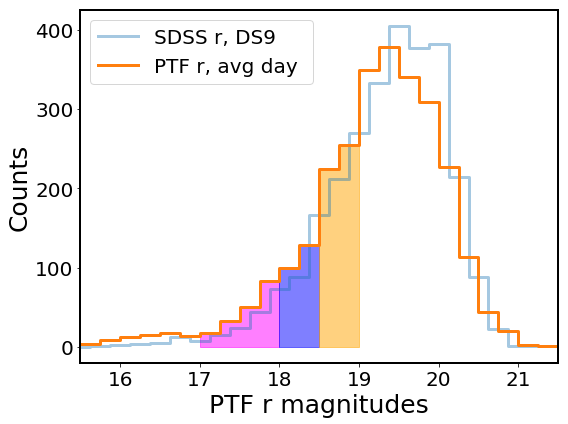

In [29]:
rcParams['ytick.labelsize'] = 20
rcParams['xtick.labelsize'] = 20
rcParams['axes.labelsize'] = 25
rcParams['axes.linewidth'] = 2
rcParams['font.size'] = 20

%matplotlib inline
x1 = 15.5
x2 = 22

fig,ax = plt.subplots(figsize=(8,6))

nbins=np.arange(15,22.2,0.25)
lw = 3 

m = (qso_cat['r'] > x1) * (qso_cat['r'] < x2)
#ax.hist(qso_cat['r'][m], histtype='step', label = 'SDSS r, DS9', bins=nbins)
hist, bin_edges = np.histogram(qso_cat['r'][m], bins=nbins, density=False)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
ax.plot(bin_centres, hist, ls='steps',  label='SDSS r, DS9', lw=lw, alpha=0.4)



m1 = (qso_cat['avg_mag'] > x1) * (qso_cat['avg_mag'] < x2) 
hist, bin_edges = np.histogram(qso_cat['avg_mag'][m1], bins=nbins, density=False)
bin_centres = (bin_edges[1:] + bin_edges[1:])/2
#ax.plot(bin_centres, hist, ls='steps',  label='PTF r, all epoch avg ', lw=lw, alpha=0.4)




m2 = (qso_cat['avg_day_mag'] > x1 ) * ( qso_cat['avg_day_mag'] < x2 )
hist, bin_edges = np.histogram(qso_cat['avg_day_mag'][m2], bins=nbins, density=False)
bin_centres = nbins[:-1] #(bin_edges[:-1] )
ax.plot(bin_centres, hist, ls='steps',  label='PTF r, avg day ', lw=lw)

# shade area under the used histogram population.... 
ax.fill_between(bin_centres, 0, hist, where = (bin_centres >= 16.8)*(bin_centres<=18), step='pre', 
                color='magenta', alpha=0.5 )

ax.fill_between(bin_centres, 0, hist, where = (bin_centres >= 17.9)*(bin_centres<=18.55), step='pre', 
                color='blue', alpha=0.5 )

ax.fill_between(bin_centres, 0, hist, where = (bin_centres >= 18.35)*(bin_centres<=19.1), step='pre', 
                color='orange', alpha=0.5 )

# the bin edges do not exactly align with sample boundaries... ignore that in my simple illustration...
#m = ((bin_centres - 17) > 0 ) * ((bin_centres - 17) < 0.15)
#ax.fill_between(x=[17, bin_centres[m][0]], y1=[0,0], y2 =  [hist[m][0], hist[m][0]],color='magenta', alpha=0.5 )

#for x in [17,18,18.5,19] : 
#    ax.axvline(x, ymax=0.5,ls='--')
ax.set_xlabel('PTF r magnitudes') # , fontsize=20 
ax.set_ylabel('Counts') # , fontsize=20 

ax.set_xlim(15.5,21.5)
ticks = ax.get_xticks()
ax.set_xticks(ticks[1:-1])

plt.legend(loc='upper left', fontsize=20 )   
#plt.title('Quasar population: magnitude selection', fontsize=15)
plt.tight_layout()
plt.savefig(outDir + 'Fig_2_Quasar_PTF_population_selection.png')
#ax.set_xlim(16.5,18.5)
#ax.set_ylim(0,50)
#ax.fill_between?


In [42]:
#qso_cat

Read in $\Delta m$, $\Delta t$ PTF files , using mag cut 18.5-19, same as for Fig.2 based on CRTS data 


In [52]:
imp.reload(mod)
Min = 18.5
Max = 19.0
mag = 'r'  # use both for SDSS-based cut, as well as for reporting mag 

print('\nUsing now only lightcurves with SDSS  %f< %s < %f' % (Min, mag, Max))
print('\n Reporting SDSS %s  '% mag)

good_ids_S_blue = mod.cut_stars(star_cat = star_cat,mMin = Min, mMax=Max,
                                mErrMax = 0.3, gi_Min = -1,
                                gi_Max=1, cut_mag=mag + '_mMed', survey='PTF')

good_ids_S_red = mod.cut_stars(star_cat = star_cat,mMin = Min, mMax=Max, 
                               mErrMax = 0.3, gi_Min = 1, 
                               gi_Max=3, cut_mag=mag + '_mMed', survey='PTF')

good_ids_QSO   = mod.cut_qso(qso_cat=qso_cat, mMin = Min, mMax=Max, mErrMax = 0.3, 
                             cut_mag=mag, survey='PTF')
 


Using now only lightcurves with SDSS  18.500000< r < 19.000000

 Reporting SDSS r  

Choosing stars with  SDSS   -1.00<g-i<1.00
 These cuts reduced the number of stars  in the sample from 15714 to 548

Choosing stars with  SDSS   1.00<g-i<3.00
 These cuts reduced the number of stars  in the sample from 15714 to 913

 Returning only QSO with  an SDSS counterpart within 2.000000 arcsec

 These cuts reduced the number of qso  in the sample from 2753 to 377


## Read the xi, ei for objects in the r_cut ... 

In [54]:
#good_ids_QSO

In [55]:
#good_ids_S_blue.astype(str)

In [56]:
inDirStars   = '../data_products/sf_file_per_LC_PTF/stars/'
inDirQSO = '../data_products/sf_file_per_LC_PTF/qso/'

out_dic = {}
out_dic['qso'] = mod.faster_read_xi_ei(inDirSF = inDirQSO,
                                       good_ids = good_ids_QSO)
out_dic['starsB'] = mod.faster_read_xi_ei(inDirSF = inDirStars,
                                          good_ids = good_ids_S_blue )
out_dic['starsR'] = mod.faster_read_xi_ei(inDirSF = inDirStars,
                                          good_ids = good_ids_S_red )

# Straight after reading-in xi, ei,   one can proceed directly to part 9) (one bin) or 10 : all bins sigma comparison 
# or to Saving just the log(tau) samples of xi, tau, ei. 



Reading in tau,xi,ei  for 377 objects

Using structure function master files from ../data_products/sf_file_per_LC_PTF/qso/
[######### ] 99.47%
Finished reading all master files for the selected objects ...

Reading in tau,xi,ei  for 548 objects

Using structure function master files from ../data_products/sf_file_per_LC_PTF/stars/
[######### ] 99.45%
Finished reading all master files for the selected objects ...

Reading in tau,xi,ei  for 913 objects

Using structure function master files from ../data_products/sf_file_per_LC_PTF/stars/
[######### ] 99.67%
Finished reading all master files for the selected objects ...


In [58]:
out_dic

{'qso': {'ei': array([ 0.06019909,  0.06090156,  0.04957953, ...,  0.07635634,
          0.07635634,  0.0762709 ]),
  'tau': array([  9.18100000e-01,   9.18900000e-01,   9.43000000e-01, ...,
           1.91181780e+03,   1.92387700e+03,   1.93188700e+03]),
  'xi': array([ 0.0621,  0.0723, -0.0443, ..., -0.114 , -0.0505, -0.0547])},
 'starsB': {'ei': array([ 0.09134993,  0.06329423,  0.06329423, ...,  0.07680163,
          0.0771295 ,  0.07694154]),
  'tau': array([  8.65100000e-01,   9.18100000e-01,   9.18900000e-01, ...,
           1.91181780e+03,   1.92387700e+03,   1.93188700e+03]),
  'xi': array([ 0.1782,  0.1335, -0.0505, ..., -0.0464, -0.011 , -0.0213])},
 'starsR': {'ei': array([ 0.20293092,  0.14103191,  0.08376139, ...,  0.05952655,
          0.06060825,  0.06008236]),
  'tau': array([  8.65100000e-01,   8.81700000e-01,   9.42900000e-01, ...,
           1.91181780e+03,   1.92387700e+03,   1.93188700e+03]),
  'xi': array([ 0.2328, -0.233 , -0.0209, ..., -0.0438, -0.0034, -0.0422

## Calculate SF, mu in approximate and  full  ways

In [57]:
# for all imports of my functions, 
# make python aware of my packages...
import sys
sys.path.insert(0, '../../SDSS_S82_FP_research/packages/')
import variabilityFunctions as varF


The thing below takes a while (up to half hour...) because calculating $\mu$, $\sigma$ based on full posterior PDF is pretty slow ... 

In [71]:
m_ij_cutoff = 2.0
print('Using |dm| < %.2f'%m_ij_cutoff)
for obj in out_dic.keys(): 
    print('\n For obj = %s'% obj) 
    m_ij = out_dic[obj]['xi']
    tau =  out_dic[obj]['tau']
    e_ij = out_dic[obj]['ei']
    
    # do that and see what happens ... 
    mask_out = abs(m_ij)<m_ij_cutoff
    print('Of %d xi points, we removed %d points'%(len(mask_out), np.sum(~mask_out)))

Using |dm| < 2.00

 For obj = qso
Of 209946 xi points, we removed 3125 points

 For obj = starsB
Of 281498 xi points, we removed 1051 points

 For obj = starsR
Of 536209 xi points, we removed 4674 points


(array([  1.44537000e+05,   1.18175000e+05,   8.38550000e+04,
          5.52770000e+04,   3.67150000e+04,   2.44630000e+04,
          1.71480000e+04,   1.19760000e+04,   8.75000000e+03,
          6.42500000e+03,   4.93300000e+03,   3.67400000e+03,
          2.86500000e+03,   2.11200000e+03,   1.73900000e+03,
          1.37600000e+03,   1.03900000e+03,   1.00400000e+03,
          7.72000000e+02,   5.99000000e+02,   4.36000000e+02,
          3.26000000e+02,   3.23000000e+02,   3.13000000e+02,
          2.99000000e+02,   2.28000000e+02,   2.45000000e+02,
          2.27000000e+02,   1.92000000e+02,   1.77000000e+02,
          1.38000000e+02,   1.22000000e+02,   1.10000000e+02,
          9.80000000e+01,   9.20000000e+01,   8.40000000e+01,
          5.80000000e+01,   3.90000000e+01,   3.30000000e+01,
          3.50000000e+01]),
 array([ 0.      ,  0.024975,  0.04995 ,  0.074925,  0.0999  ,  0.124875,
         0.14985 ,  0.174825,  0.1998  ,  0.224775,  0.24975 ,  0.274725,
         0.2997  ,

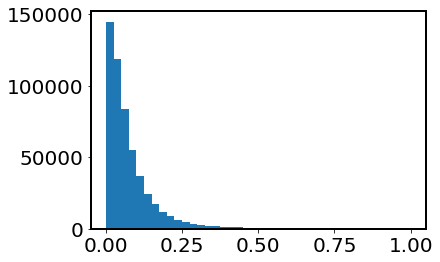

In [74]:
plt.hist(np.abs(m_ij)[np.abs(m_ij) < 1 ], bins=40)

In [76]:
# Run the calculation over all bins : 
# - keep the option to plot a bin if one wants to compare the three methods : 
#  need to provide object N
#   
# - as it is, calculate three values for sigma, etc., and plot it  

# set the bin number 
nbins = 200 

# set the m_ij cutoff 
# Makes sense, given that it removes a tiny fraction of 
# points, most likely CCD problems, or cosmic rays - 
# the input data was not sigma-clipped in any way... 
m_ij_cutoff = 1.0

# Set a directory to save the results...
outDir = os.path.join(os.getcwd()[:-4]+'data_products/'+'PTF_Fig_2_data/')
if not os.path.exists(outDir): os.system('mkdir %s' % outDir)
                      
outDir = os.path.join(os.getcwd()[:-4],'data_products/'+'PTF_Fig_2_data', 
                      datetime.datetime.now().strftime('%Y-%m-%d')+ '/')
if not os.path.exists(outDir): os.system('mkdir %s' % outDir)
                      
print('Today we will save our Fig_2 files in %s'%outDir)

# Loop over objects in the dictionary  
for obj in out_dic.keys(): 
    print('\n For obj = %s'% obj) 
    m_ij = out_dic[obj]['xi']
    tau =  out_dic[obj]['tau']
    e_ij = out_dic[obj]['ei']
    
    # do that and see what happens ... 
    mask_out = abs(m_ij)<m_ij_cutoff
    m_ij = m_ij[mask_out]
    tau = tau[mask_out]
    e_ij = e_ij[mask_out]
    
    #n =  out_dic[b][obj][3]

    # Pull out some tau to plot means : common to all panels 
    binned_tau = binned_statistic(tau, tau, statistic='mean', bins=nbins)
    mean_tau = binned_tau[0]
    
    # Take N from each bin... 'count' function works like a regular histogram
    binned_count = binned_statistic(tau, tau, statistic='count', bins=nbins)
    bin_count = binned_count[0]
    #bin_names = np.arange(1,len(binned_count[2]))

    # Calculate median preprocessed photometric error per bin 
    binned_err_median = binned_statistic(tau, e_ij, statistic='median', bins=nbins) 
    err_median = binned_err_median[0]

    # make sure that there are no empty bins : such calculation would be truly obsolete... 
    non_empty_bins = np.bitwise_not(np.isnan(mean_tau))

    # reassign number of points in a bin and  tau position 
    bin_count = bin_count[non_empty_bins]
    mean_tau = mean_tau[non_empty_bins]
    err_median = err_median[non_empty_bins]

    # A long list telling which point belongs to which bin
    bin_number  = binned_tau[2]
    
    ####
    ####  Panel 1 : Standard Deviation 
    ####

    rms_std = lambda x : np.std(x)
    stdev_binned = binned_statistic(tau, m_ij, statistic = rms_std, 
                                              bins=nbins)
    bin_stdev = stdev_binned[0][non_empty_bins]  

    #####
    ##### Panel 2  : Gaussian rms  
    #####
    rms_robust = lambda x : 0.7414 *(np.percentile(x,75) - np.percentile(x,25))
    bin_sigma_G = binned_statistic(tau, m_ij, statistic = rms_robust, 
                                      bins=nbins)[0][non_empty_bins]

    #####
    ##### Panel 3 (SF)   and Panel 4   (mu)
    #####


    # Loop over all bins  calculating approximate mu and sigma 

    mu_bins = {}
    sig_bins = {}
    #nbins = len(bin_count)

    sig_bins['approx'] = np.zeros(nbins)
    mu_bins['approx'] = np.zeros(nbins)
    sig_bins['full'] = np.zeros(nbins)
    mu_bins['full'] = np.zeros(nbins)
    
    for N in np.unique(bin_number):
        print('\r --- Calculating mu, sigma for bin %d' % N),
        xi = m_ij[bin_number == N]
        ei = e_ij[bin_number == N]
        print('N_points = %d'%len(xi))
   
        mu_approx, sig_approx = varF.approximate_mu_sigma(xi, ei)
        mu_full, sig_full =  varF.get_mu_sigma(xi,ei)
        
        sig_bins['approx'][N-1] = sig_approx
        sig_bins['full'][N-1] = sig_full
        
        mu_bins['approx'][N-1] = mu_approx
        mu_bins['full'][N-1] = mu_full 

    # select only those bins which are non-zero...
    for key in ['approx','full']:
        sig_bins[key] = sig_bins[key][non_empty_bins]
        mu_bins[key] = mu_bins[key][non_empty_bins]
    
    # Save the results of calculation  : Panel 1,2,3,4 
    fname = outDir+str(Min)+'-'+str(Max)+'_'+obj+'_mij_lt_'+str(m_ij_cutoff)+'.txt'
    
    data = np.column_stack((mean_tau, bin_stdev, bin_sigma_G, sig_bins['full'], 
                            sig_bins['approx'], mu_bins['full'], mu_bins['approx'], 
                            bin_count))

    header = 'meanTau   stdev    sigmaG   sigmaFull  sigmaApprox   muFull  muApprox   binCount'
    np.savetxt(fname, data, fmt = '%s', delimiter = ' ' , header=header )
    print('Results saved as %s' % fname)

print('Done with calculating panel data ')

Today we will save our Fig_2 files in /Users/chris/GradResearch/CRTS_PROJECT/data_products/PTF_Fig_2_data/2017-08-15/

 For obj = qso
 --- Calculating mu, sigma for bin 1
N_points = 19159
 --- Calculating mu, sigma for bin 2
N_points = 10163
 --- Calculating mu, sigma for bin 3
N_points = 9809
 --- Calculating mu, sigma for bin 4
N_points = 7550
 --- Calculating mu, sigma for bin 5
N_points = 6094
 --- Calculating mu, sigma for bin 6
N_points = 6343
 --- Calculating mu, sigma for bin 7
N_points = 4705
 --- Calculating mu, sigma for bin 8
N_points = 3222
 --- Calculating mu, sigma for bin 9
N_points = 2813
 --- Calculating mu, sigma for bin 10
N_points = 2085
 --- Calculating mu, sigma for bin 11
N_points = 2840
 --- Calculating mu, sigma for bin 12
N_points = 2352
 --- Calculating mu, sigma for bin 13
N_points = 1787
 --- Calculating mu, sigma for bin 14
N_points = 1253
 --- Calculating mu, sigma for bin 15
N_points = 1392
 --- Calculating mu, sigma for bin 16
N_points = 801
 --- Calcu

Plot below the raw $\Delta m_{ij}$ for quasars, applying my mask. 

/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:27: RuntimeWarning: divide by zero encountered in log10


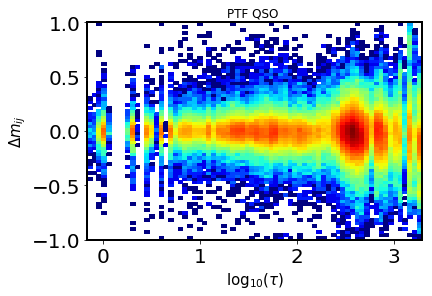

In [78]:
obj = 'qso'
m_ij_cutoff = 1.0

m_ij = out_dic[obj]['xi']
tau =  out_dic[obj]['tau']
e_ij = out_dic[obj]['ei']


rms_std = lambda x : np.std(x)
stdev_binned = binned_statistic(tau, m_ij, statistic = rms_std, 
                                      bins=nbins)
bin_stdev = stdev_binned[0][non_empty_bins]

# some m_ij seems completely unphysical... seems that there may be some 'outlier' points in lightcurves 
# that are completely off the scale, and maybe should be discarded at earlier  stage ... 

# makes sense that if there is one outlier point, then all magnitude differences calculated from 
# that point will be offset as much as that point 

m=abs(m_ij)<m_ij_cutoff
H, xedges, yedges = np.histogram2d(np.log10(tau[m]), m_ij[m], bins=70)
H = np.rot90(H)
H = np.flipud(H)
# Mask zeros
Hmasked = np.ma.masked_where(H==0,H) # Mask pixels with a value of zeropltssssss
# Plot 2D histogram using pcolor
plt.pcolormesh(xedges,yedges,np.log10(Hmasked), cmap='jet')
plt.xlabel(r'$\log_{10}(\tau)$', fontsize=15)
plt.ylabel(r'$\Delta m_{ij}$',fontsize=15)
plt.title('PTF QSO ')
plt.savefig(outDir+'Fig_2_'+str(Min)+'-'+str(Max)+'_raw_data.png')

In [79]:
# NUMPY SAVE  :  A FANTASTIC  MOVE ! 
savefile = outDir+str(Min)+'-'+str(Max)+'_out_dic'
np.save(savefile, out_dic)

#Demonstrate loading 
load_npy = np.load(savefile+'.npy')

In [81]:
# recover the out_dic with all xi, ei for 
# PTF 18.5-19  objects ..
# http://stackoverflow.com/questions/30811918/saving-dictionary-of-numpy-arrays 
out_dic = load_npy[()]

{'qso': {'ei': array([ 0.06019909,  0.06090156,  0.04957953, ...,  0.07635634,
          0.07635634,  0.0762709 ]),
  'tau': array([  9.18100000e-01,   9.18900000e-01,   9.43000000e-01, ...,
           1.91181780e+03,   1.92387700e+03,   1.93188700e+03]),
  'xi': array([ 0.0621,  0.0723, -0.0443, ..., -0.114 , -0.0505, -0.0547])},
 'starsB': {'ei': array([ 0.09134993,  0.06329423,  0.06329423, ...,  0.07680163,
          0.0771295 ,  0.07694154]),
  'tau': array([  8.65100000e-01,   9.18100000e-01,   9.18900000e-01, ...,
           1.91181780e+03,   1.92387700e+03,   1.93188700e+03]),
  'xi': array([ 0.1782,  0.1335, -0.0505, ..., -0.0464, -0.011 , -0.0213])},
 'starsR': {'ei': array([ 0.20293092,  0.14103191,  0.08376139, ...,  0.05952655,
          0.06060825,  0.06008236]),
  'tau': array([  8.65100000e-01,   8.81700000e-01,   9.42900000e-01, ...,
           1.91181780e+03,   1.92387700e+03,   1.93188700e+03]),
  'xi': array([ 0.2328, -0.233 , -0.0209, ..., -0.0438, -0.0034, -0.0422

### Aside : Figure out how many points are removed by cutting off outliers... 

To be able to say that we have enough  magnitude-difference points to split them into 200 bins, and that removing the outliers  that are off by more than +/- 1 mag from 0 does not make much difference in the number of points used , but it does make the SF (variance measure) much more informative. 

In [421]:
objects = ['qso', 'starsB', 'starsR']
m_ij_cutoff = 1.0 

stats_dic = {17:{}, 18:{}, 18.5:{}}
stats_dic = {}
for Min in Min_arr : 
    stats_dic[Min] = {}
    for obj in objects :
        stats_dic[Min][obj] = {}

for i in range(3):
    for obj in objects : 
        m_ij = out_dic[Min_arr[i]][obj][0]
        mask=abs(m_ij)<m_ij_cutoff
        in_bounds = np.sum(mask)
        percent_removed = (np.sum(~mask) / float(len(mask)))*100.0
        print('For %.2f-%.2f mag,  %s have %d m_ij with abs(m_ij) <1.0, and only %f %% was removed by this cut'
              %(Min_arr[i], Max_arr[i], obj, in_bounds, percent_removed))
        
        stats_dic[Min_arr[i]][obj]['N'] = in_bounds
        stats_dic[Min_arr[i]][obj]['perc_removed'] = percent_removed
    print(' ')

For 17.00-18.00 mag,  qso have 37870 m_ij with abs(m_ij) <1.0, and only 1.756298 % was removed by this cut
For 17.00-18.00 mag,  starsB have 526358 m_ij with abs(m_ij) <1.0, and only 0.496047 % was removed by this cut
For 17.00-18.00 mag,  starsR have 682627 m_ij with abs(m_ij) <1.0, and only 1.137897 % was removed by this cut
 
For 18.00-18.50 mag,  qso have 108545 m_ij with abs(m_ij) <1.0, and only 2.057298 % was removed by this cut
For 18.00-18.50 mag,  starsB have 287225 m_ij with abs(m_ij) <1.0, and only 0.556034 % was removed by this cut
For 18.00-18.50 mag,  starsR have 453370 m_ij with abs(m_ij) <1.0, and only 0.995137 % was removed by this cut
 
For 18.50-19.00 mag,  qso have 206669 m_ij with abs(m_ij) <1.0, and only 1.560878 % was removed by this cut
For 18.50-19.00 mag,  starsB have 280235 m_ij with abs(m_ij) <1.0, and only 0.448671 % was removed by this cut
For 18.50-19.00 mag,  starsR have 531009 m_ij with abs(m_ij) <1.0, and only 0.969771 % was removed by this cut
 


In [430]:

for key in stats_dic.keys() :
    avg_N_over_obj = []
    for obj in objects:  
        avg_N_over_obj.append(stats_dic[key][obj]['N'])
    print('For min Mag %.2f, the mean N is %.2f'%(key, np.mean(avg_N_over_obj)))
    
print(' ')
for obj in objects: 
    avg_N_over_mag = [] 
    for key in stats_dic.keys():
        avg_N_over_mag.append(stats_dic[key][obj]['N'])
    print('For obj %s, the mean N is %.2f'%(obj, np.mean(avg_N_over_mag)))

For min Mag 17.00, the mean N is 415618.33
For min Mag 18.00, the mean N is 283046.67
For min Mag 18.50, the mean N is 339304.33
 
For obj qso, the mean N is 117694.67
For obj starsB, the mean N is 364606.00
For obj starsR, the mean N is 555668.67


In [426]:
N

[206669, 280235, 531009]

## Read in the calculation results 

If the calculation for each bin has already been done, and only some fine tuning is needed for the figure, you can set the Min, Max mags for the cut below, and we will read in the results from the files and plot it all. 

In [86]:
import numpy as np 
from collections import OrderedDict
plot_data = OrderedDict()

Min = 18.5
Max = 19.0

#outDir = os.path.join(os.getcwd()[:-4],'data_products/'+'Fig_2_data', 
#                      datetime.datetime.now().strftime('%Y-%m-%d')+ '/')
m_ij_cutoff = 1.0 
#outDir = '../data_products/PTF_Fig_2_data/2017-01-20/'
for obj in ['qso', 'starsB', 'starsR']:
    plot_data[obj] = {}

    fname = outDir+str(Min)+'-'+str(Max)+'_'+obj+'_mij_lt_'+str(m_ij_cutoff)+'.txt'
    print('Reading from %s'%fname)

    colnames = open(fname,'r').read().splitlines()[0][1:].split()
    d = np.genfromtxt(fname, dtype=float)

    for label, column in zip(colnames, d.T):
        plot_data[obj][label] = column


Reading from /Users/chris/GradResearch/CRTS_PROJECT/data_products/PTF_Fig_2_data/2017-08-15/18.5-19.0_qso_mij_lt_1.0.txt
Reading from /Users/chris/GradResearch/CRTS_PROJECT/data_products/PTF_Fig_2_data/2017-08-15/18.5-19.0_starsB_mij_lt_1.0.txt
Reading from /Users/chris/GradResearch/CRTS_PROJECT/data_products/PTF_Fig_2_data/2017-08-15/18.5-19.0_starsR_mij_lt_1.0.txt


## Make Fig.2 : four-panel plot (can run only cells below to make  Fig.2) 

Note: now since we are convinced that the full results are better than the approximate ones, we plot only muFull and sigmaFull. But muApprox and sigmaApprox is still there... 

Figure is saved as /Users/chris/GradResearch/CRTS_PROJECT/data_products/PTF_Fig_2_data/2017-08-15/Fig_2_18.5-19.0_PTF_Approx.png


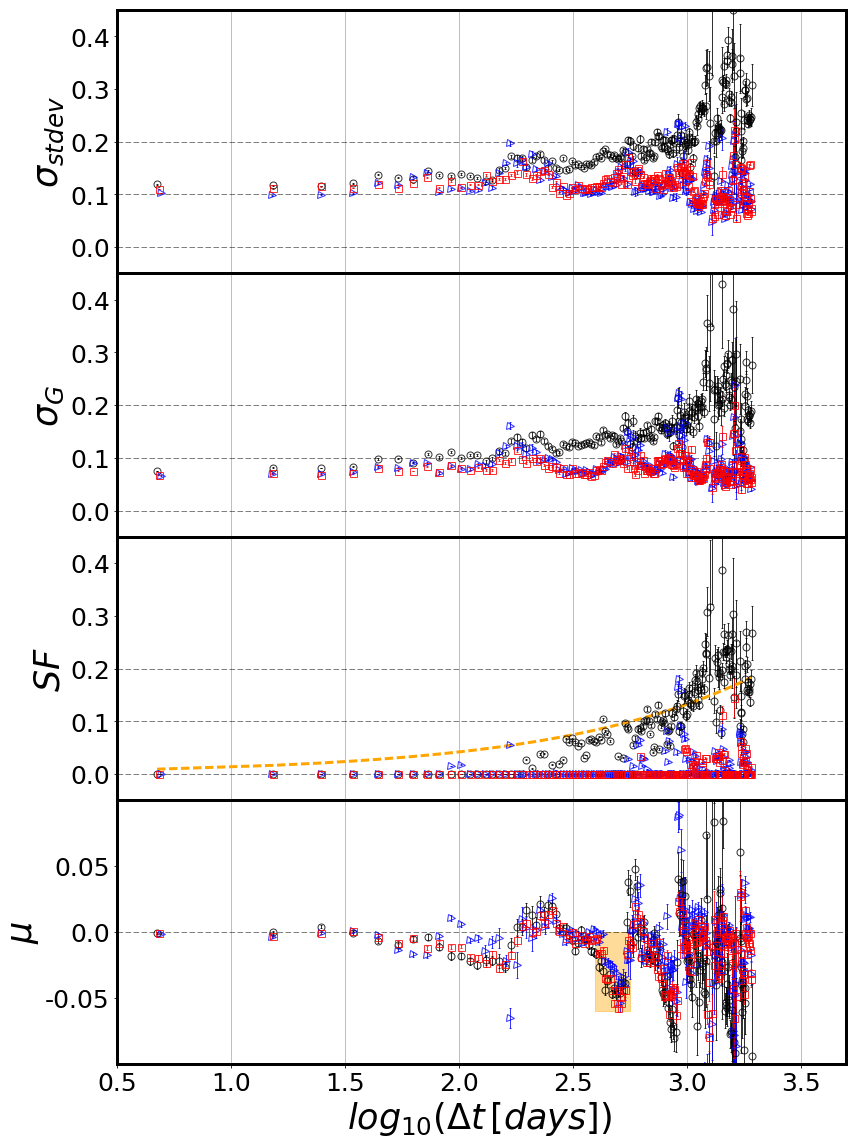

In [89]:
from matplotlib import rcParams
import matplotlib.pyplot as plt 
from scipy.optimize import curve_fit

rcParams['ytick.labelsize'] = 25
rcParams['xtick.labelsize'] = 25
rcParams['axes.labelsize'] = 35
rcParams['axes.linewidth'] = 3
rcParams['font.size'] = 25
rcParams.update({'figure.autolayout': False})

%matplotlib inline
# set all plot parameters
lh_w   = 1.0  # horizontal line thickness 
lh_st  = '--' # horizontal line style 
lh_al  = 0.5  # horizontal line alpha parameter 

# dot size 
p_size = 7 # 7
p_al   = 0.5 

# y limits for sigma, sigma_G, SF panels 
y_top  = 0.45
y_bott = -0.05

# y limits for mu approx 
y_mu_top = 0.1
y_mu_bott = -0.1

# x limits for ALL PANELS 
x_left = 0.5
x_right = 3.7

# choose sigma calculation type to be displayed...
calc = 'Approx'

# colors for quasars, blue and red stars 
obj_arr = ['qso',  'starsB']
colors= {'qso':'black',  'starsB':'blue' , 'starsR':'red'}
markers = {'qso':'o',  'starsB': '>', 'starsR': 's'}

def plot_errorbar(ax, x,y,yerr, obj, linestyle='None', markersize=p_size,
                 markerfacecolor='None',elinewidth=1, 
                  markeredgewidth=1, capsize=1, alpha=0.8, colors=colors, 
                  markers=markers ):
    ''' A quick convenience function to use the 
    same default markers, etc. for all plots
    '''
    ax.errorbar(x,y,yerr,linestyle=linestyle, c = colors[obj],
                marker=markers[obj],  markersize=p_size, markeredgecolor=colors[obj],
                markerfacecolor='None', markeredgewidth=1,  elinewidth=1, capsize=1, 
                alpha=0.8)
   

fig,ax = plt.subplots(4,1, figsize=(12,16), sharex=True)


# Panel 1 
for obj in plot_data.keys() : 
    x = np.log10(plot_data[obj]['meanTau'])
    y = plot_data[obj]['stdev']
    yerr = plot_data[obj]['stdev'] / np.sqrt(2.0*(plot_data[obj]['binCount'] - 1.0))
    plot_errorbar(ax[0], x,y,yerr, obj)
        
ax[0].set_ylabel(r'$\sigma_{stdev}$')   
ax[0].tick_params( axis='x', which='both',  bottom='off', 
                top='off', labelbottom='off') 
ax[0].set_ylim(bottom=y_bott, top=y_top)


# Panel 2
for obj in plot_data.keys() : 
    x = np.log10(plot_data[obj]['meanTau'])
    y = plot_data[obj]['sigmaG']
    yerr = plot_data[obj]['sigmaG']* 1.06 / np.sqrt(plot_data[obj]['binCount'])
    plot_errorbar(ax[1], x,y,yerr, obj)

ax[1].set_ylabel(r'$\sigma_{G}$')   # ,fontsize=20 
ax[1].tick_params( axis='x', which='both',  bottom='off', 
                top='off', labelbottom='off') 
ax[1].set_ylim(bottom=y_bott, top=y_top)

# Panel 3
def model_sf(t, sf_inf=0.25, tau = 1.0):
    br = 1.0-np.exp(-t/tau)
    sf = sf_inf * np.power(br,0.5)
    return sf

# Calculate the model DRW fit for QSO
obj = 'qso'
xdata = plot_data[obj]['meanTau']
sf = plot_data[obj]['sigma'+calc]
popt, pcov = curve_fit(model_sf, xdata, sf)
y = model_sf(xdata, sf_inf=popt[0], tau = popt[1]) # tau 1 year in days 

# Fold-in the error to the model SF , plot 
# both folded and not-folded version 

err_sig = plot_data[obj]['sigma'+calc]* 1.06 / np.sqrt(plot_data[obj]['binCount'])
ax[2].plot(np.log10(xdata), y , lw=3, c = 'orange', ls='--')

# plot approximate sigma 
for obj in plot_data.keys() : 
    x = np.log10(plot_data[obj]['meanTau'])
    y = plot_data[obj]['sigma'+calc] 
    yerr = plot_data[obj]['sigma'+calc]* 1.06 / np.sqrt(plot_data[obj]['binCount'])
    plot_errorbar(ax[2], x,y,yerr, obj)
    
ax[2].set_ylim(bottom=y_bott, top=y_top)
ax[2].set_ylabel(r'$SF $') 
ax[2].tick_params( axis='x', which='both',  bottom='off', 
                top='off', labelbottom='off')

for i in [0,1,2] : 
    ax[i].grid(axis='x')
    ax[i].set_yticks([0,0.1,0.2,0.3,0.4])
    ax[i].set_yticklabels(['0.0','0.1', '0.2', '0.3', '0.4'])
    ax[i].axhline(y=0.0, color='black', lw=lh_w, ls=lh_st,alpha=lh_al)    
    ax[i].axhline(y=0.1, color='black', lw=lh_w, ls=lh_st,alpha=lh_al)
    ax[i].axhline(y=0.2, color='black', lw=lh_w, ls=lh_st,alpha=lh_al) 
    ax[i].set_xlim(left=x_left, right=x_right)

# Panel 4 
for obj in plot_data.keys() : 
    x = np.log10(plot_data[obj]['meanTau'])
    y = plot_data[obj]['mu'+calc] 
    yerr  = plot_data[obj]['stdev'] / np.sqrt(plot_data[obj]['binCount'])
    plot_errorbar(ax[3], x,y,yerr, obj)
    
ax[3].axhline(y=0.0, color='black', lw=lh_w, ls=lh_st,alpha=lh_al)
ax[3].set_ylim(top=y_mu_top, bottom=y_mu_bott)
ax[3].set_yticks([-0.05,0,0.05])
ax[3].set_yticklabels(['-0.05','0.0', '0.05'])  
ax[3].set_ylabel(r'$\mu$') 

ax[3].grid(axis='x')
ax[3].set_xlabel(r'$log_{10} (\Delta t \, [days] )$ ') 

vline_color = 'orange'
ax[3].fill_between([2.6, 2.75], y1=-0.06, y2=0, color='orange', alpha=0.4)
figname = outDir+'Fig_2_'+str(Min)+'-'+str(Max)+'_PTF_'+calc+'.png'
plt.tight_layout()
fig.subplots_adjust(hspace=0)
plt.savefig(figname)
print('Figure is saved as %s'% figname )


## Test the calculation results in one $\delta t$ bin

In [91]:
# Choose bin 180...
bin_number = 140
array_pos = bin_number - 1 
obj = 'qso'

# results for stats for each bin are stored as a dic ...
for key in plot_data[obj].keys() : 
    value  = plot_data[obj][key][array_pos]
    print('%20s  %f'% (key, value))

             meanTau  1396.101935
               stdev  0.224747
              sigmaG  0.221085
           sigmaFull  0.189615
         sigmaApprox  0.191980
              muFull  0.016377
            muApprox  0.029300
            binCount  325.000000


Stdev 0.172803 
bin count 110
mean 0.019473
median 0.038550
Stdev 0.204337 
bin count 177
mean -0.063485
median -0.049000
Stdev 0.273455 
bin count 251
mean 0.003115
median 0.010700
Stdev 0.324782 
bin count 24
mean -0.158354
median -0.126150
Stdev 0.201675 
bin count 23
mean -0.017978
median -0.040200
Stdev 0.327421 
bin count 231
mean 0.109550
median 0.090900
Stdev 0.276557 
bin count 418
mean -0.062910
median -0.051500


/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/numpy/core/_methods.py:82: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)
/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/numpy/core/_methods.py:94: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/numpy/core/_methods.py:116: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/numpy/core/_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/chris/anaconda3/envs/py36/

Stdev nan 
bin count 0
mean nan
median nan
Stdev 0.220721 
bin count 79
mean 0.054313
median -0.026200
Stdev 0.280375 
bin count 221
mean -0.136123
median -0.138400


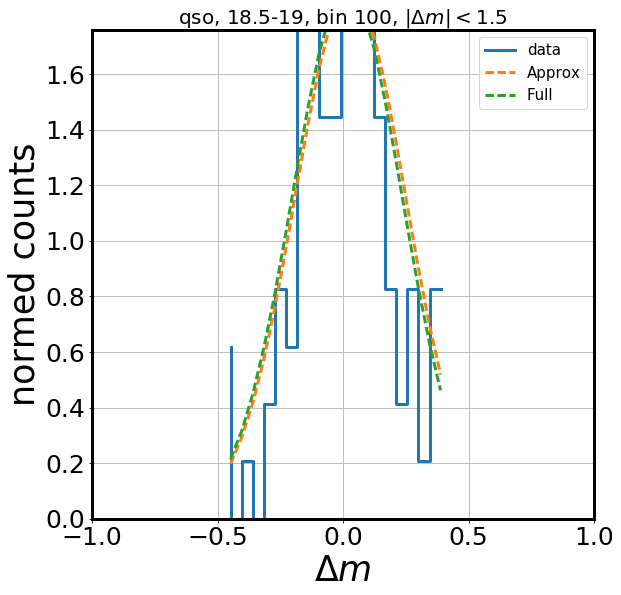

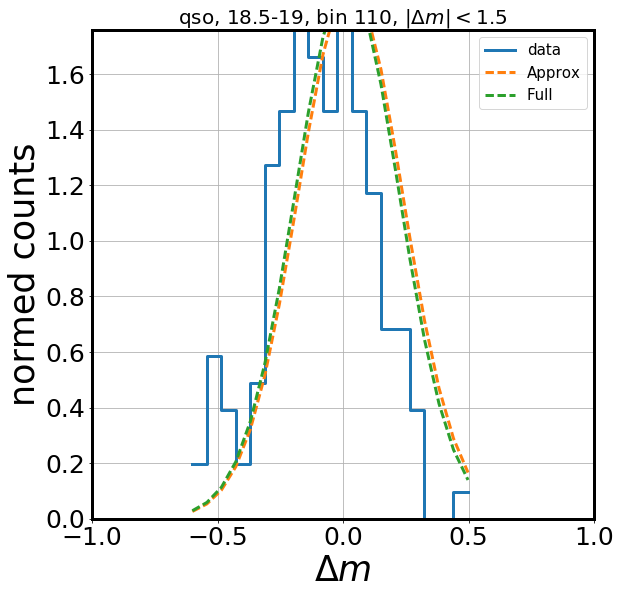

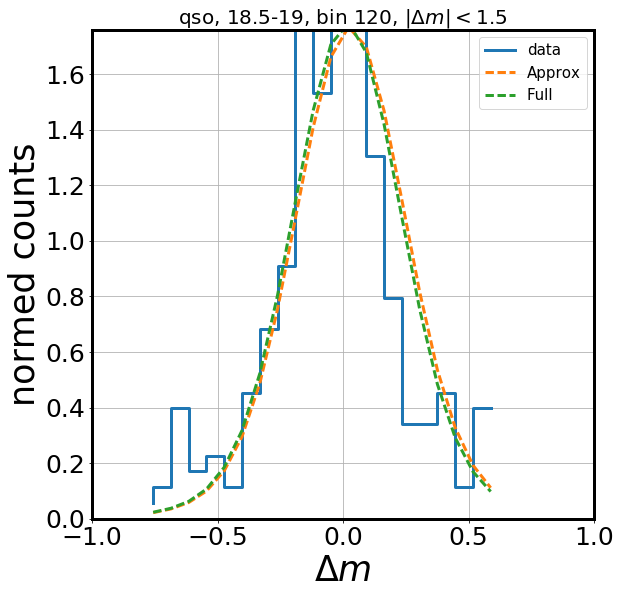

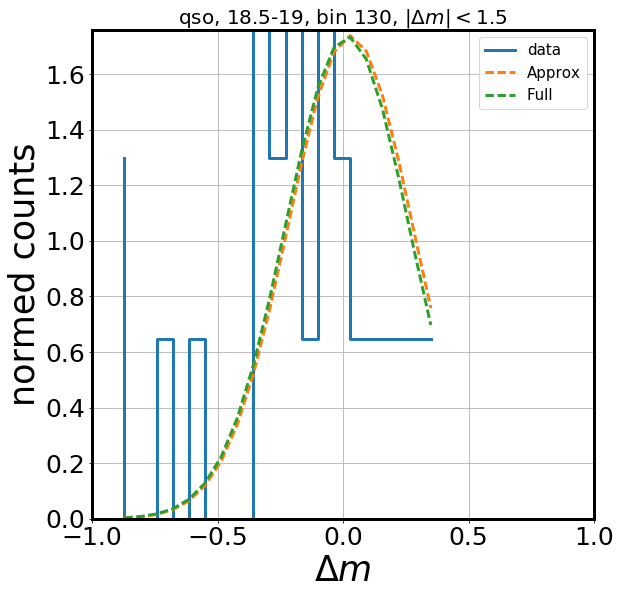

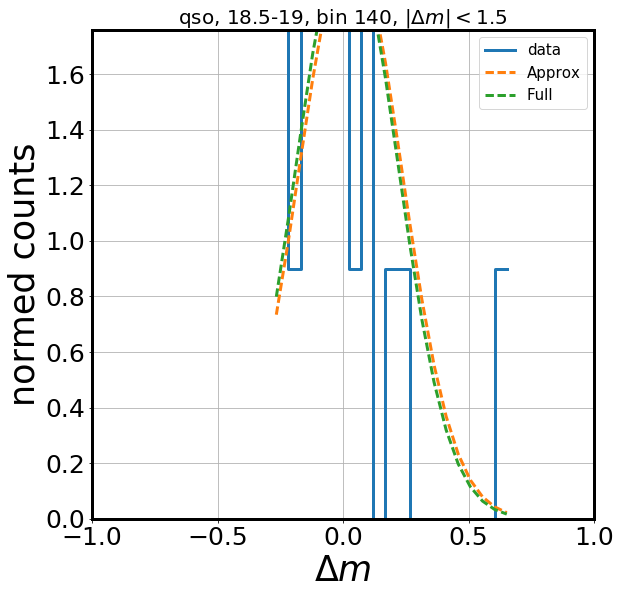

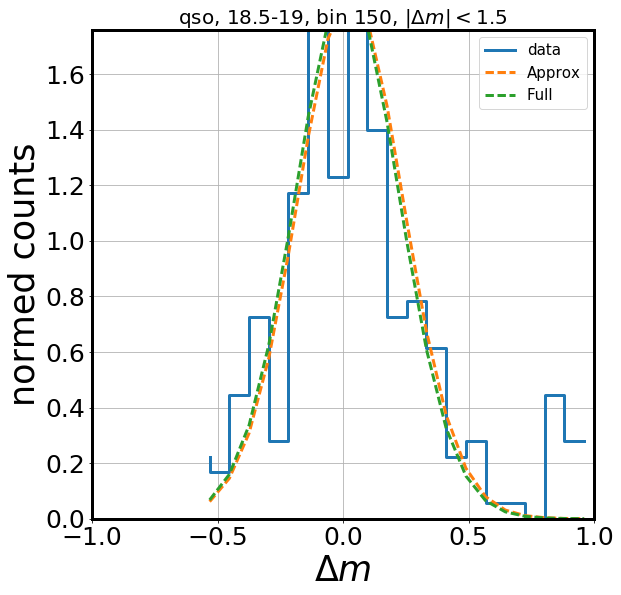

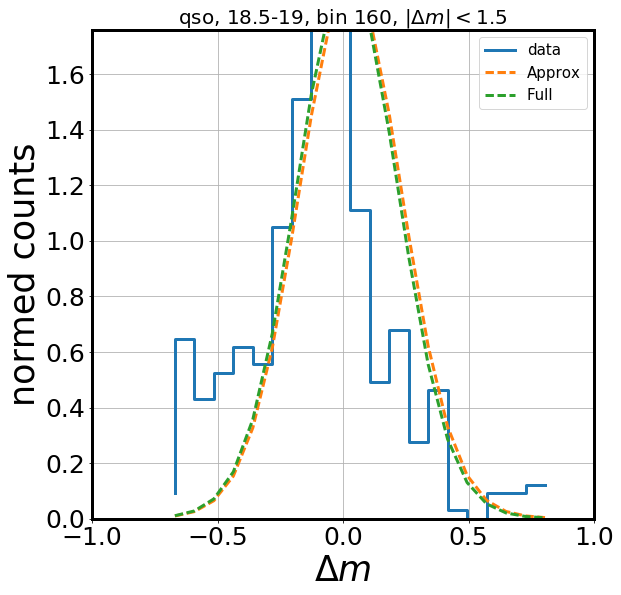

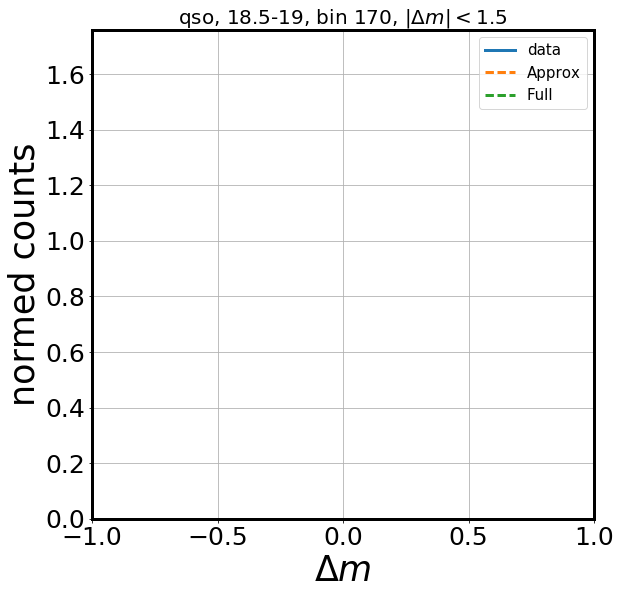

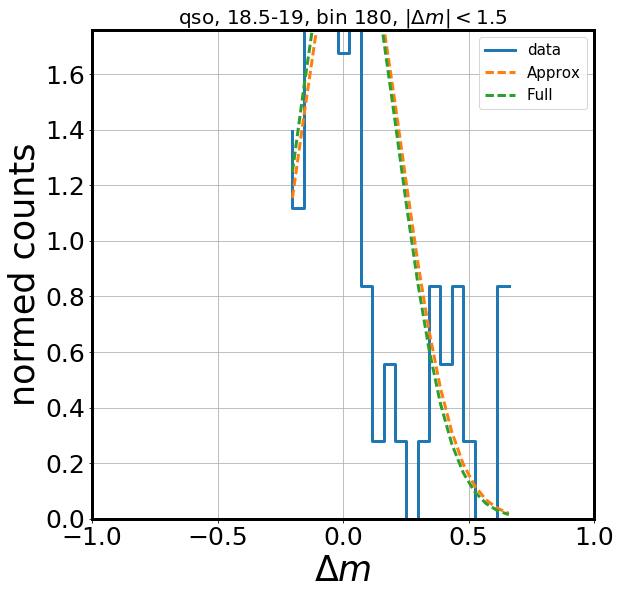

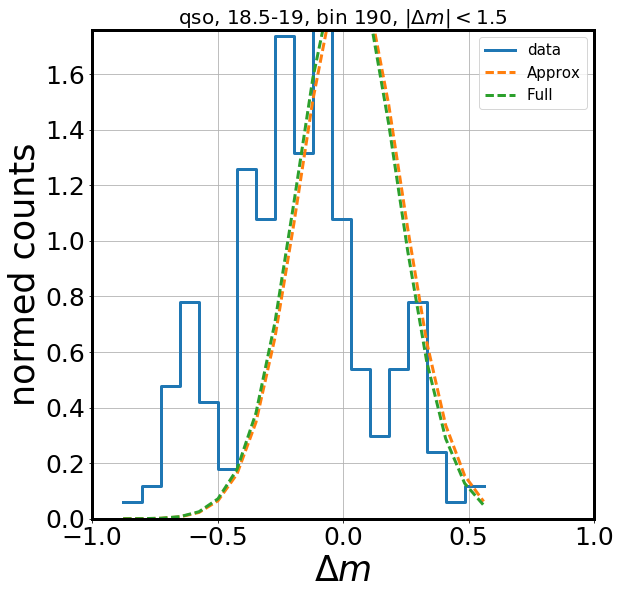

In [96]:
# Select all raw points that enter that bin..
# It's really like making a cross-section 
# through the raw data  plot 

obj = 'qso' #
m_ij = out_dic[obj]['xi']
e_ij = out_dic[obj]['ei']
tau =  out_dic[obj]['tau']

# doesn't matter what statistic , count would suffice : 
# all I need is to bin along tau 
nbins = 200
hist_bins = 20 
binned_tau = binned_statistic(tau, tau, statistic = 'count', bins=nbins)

max_mi = 1.0

# choose the bin to analyze ...
for Nb in np.arange(100,200,10) : 

    # Sanity check : 
    # whatever stdev  or  bin count I find here,
    # ought be exactly the same as in the previously calculated 
    # stats...
    m1 = binned_tau.binnumber == Nb
    print('Stdev %f '% np.std(m_ij[m1]))
    print('bin count %d'%np.sum(m1))
    print('mean %f'%np.mean(m_ij[m1]))
    # muApprox is a median ... 
    print('median %f'%np.median(m_ij[m1])) 

    fig,ax = plt.subplots(1,1,figsize=(9,9))
    # do clipping for the sake of clean histogram..
    m2 = np.abs(m_ij)  <  max_mi
    m = m1 * m2 
    mi = m_ij[m]
    ei = e_ij[m]


    def model(xi, SF=None, mu=None, ei=ei) : 
        sig_i_tot = np.sqrt(ei**2.0 + SF**2.0)
        summed = (1 / (np.sqrt(2 * np.pi ) * sig_i_tot)) * \
             np.exp(-(xi-mu)**2.0 / (2 * sig_i_tot**2.0) )
        return np.sum(summed)

    # Plot the data histogram 
    hist, bin_edges = np.histogram(mi, bins=hist_bins, normed=True)
    bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
    ax.plot(bin_centres, hist, ls='steps', label='data', lw=3)

    # choose model plot ls, lw 
    ls = '--'
    lw= 3

    # overplot the approx model evaluated on the bin_centres
    choice = 'Approx'
    SF= plot_data[obj]['sigma'+choice][array_pos]
    mu = plot_data[obj]['mu'+choice][array_pos]

    y  = np.array([model(mi, SF=SF, mu = mu) for mi in bin_centres])
    step = (bin_centres[1] - bin_centres[0]) 
    # normalize : that way,  
    y = y / np.sum(step*y)
    # np.sum(y * step) = 1.0 , just as we'd have 
    # for a normed histogram 
    ax.plot(bin_centres, y, label=choice, ls=ls, lw=lw )

    # overplot the full model evaluated on the bin_centres
    choice = 'Full'
    SF = plot_data[obj]['sigma'+choice][array_pos]
    mu = plot_data[obj]['mu'+choice][array_pos]

    y  = np.array([model(mi, SF=SF, mu = mu) for mi in bin_centres])
    step = (bin_centres[1] - bin_centres[0]) 
    # normalize : that way,  
    y = y / np.sum(step*y)
    # np.sum(y * step) = 1.0 , just as we'd have 
    # for a normed histogram 
    ax.plot(bin_centres, y, label=choice, ls=ls, lw=lw )
    plt.legend(fontsize=15)

    ax.set_xlabel(r'$\Delta m$')
    ax.set_ylabel('normed counts')
    ax.grid()

    ax.set_title('qso, 18.5-19, bin '+str(Nb)+', '+ r'$|\Delta m| < 1.5$', 
                 fontsize=20)
    ax.set_xlim(-max_mi,max_mi)
    ax.set_ylim(0,1.76)
    plt.savefig(outDir + 'qso_18.5-19_bin_'+str(Nb)+'.png', bbox_inches=  'tight')

### Histogram of all $\Delta m$ points (across all bins )

Plot the histogram of $\Delta m_{ij}$ for points that have surprisingly low mean ...

In [482]:
rcParams['ytick.labelsize'] = 20
rcParams['xtick.labelsize'] = 20
rcParams['axes.labelsize'] = 25
rcParams['axes.linewidth'] = 2
rcParams['font.size'] = 20

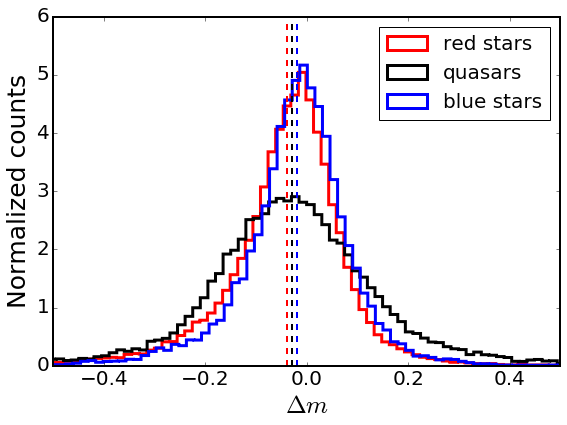

In [486]:
import matplotlib 
#matplotlib.rc('xtick', labelsize=15) 
#matplotlib.rc('ytick', labelsize=15) 

fig,ax = plt.subplots(figsize=(8,6))

xmax = 0.5
xmin = -xmax

colors = {'qso':'black', 'starsB':'blue', 'starsR':'red'}
labels  = {'qso':'quasars', 'starsB':'blue stars', 'starsR':'red stars'}
b = 'r_cut'
for obj in out_dic[b].keys() : 
    m_ij = out_dic[b][obj][0]
    tau = out_dic[b][obj][1]

    # remove outliers , in the same way as for the plot above 
    m1  = abs(m_ij) < 1.0

    # choose the right timescale 
    tau1 = np.power(10,2.6)
    tau2 = np.power(10,2.75)
    m2 =  (tau1 < tau)*(tau <tau2)
    
    # select only to plot those within the axis bounds
    m3 = abs(m_ij) < 0.6 
    
    # combine masks together 
    m = m1*m2*m3
    
    # plot the histogram
    ax.hist(m_ij[m], histtype='step', bins=80, label=labels[obj], normed=True, lw=3, color=colors[obj])
    
    # vertical lines
    ax.axvline(np.mean(m_ij[m]), ls='--', color = colors[obj] , lw=2)

ax.set_xlabel(r'$\Delta m$') # , fontsize=20
ax.set_ylabel('Normalized counts') # , fontsize=20 
ax.set_xlim(xmin, xmax)
#ax.set_title(r'$ %.2f< \Delta t < %.2f $  [days] '%(tau1, tau2), ) # , fontsize = 20  
plt.legend(fontsize=20)
plt.tight_layout()
plt.savefig(outDir +'Fig_2_'+str(Min)+'-'+str(Max)+'_log_2.6-2.75_hist.png' )

